In [1]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess

import pandas

df = pandas.read_csv("for_gensim.csv")

df.head()

comments = df["Improve"]

comments = comments[:5000]


In [2]:
description = comments.apply(lambda x: x.split()).tolist()

In [3]:
# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in comments]

# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
# pprint(mycorpus)


In [4]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(description, min_count = 0, workers=-1)

In [5]:
model.wv.most_similar(['staff'])

[('freezer', 0.38997870683670044),
 ('presented', 0.34004950523376465),
 ('main', 0.32935667037963867),
 ('mini', 0.3289135992527008),
 ('tourneys', 0.31185415387153625),
 ('occassionally', 0.29974737763404846),
 ('resocialisation', 0.29753273725509644),
 ('storrer', 0.29601502418518066),
 ('consistemcy', 0.28750380873680115),
 ('refusing', 0.2870364189147949)]

In [6]:
# fast-text

from gensim.test.utils import common_texts
from gensim.models import FastText
model2 = FastText(description, size=4, window=3, min_count=1, iter=10)

In [7]:
model2.wv.most_similar(['treatment'])

[('solving', 0.9999938607215881),
 ('caring', 0.9999348521232605),
 ('grieving', 0.9998719692230225),
 ('detoxing', 0.9998375773429871),
 ('heckling', 0.9997458457946777),
 ('jumping', 0.9997227191925049),
 ('payment', 0.9997150897979736),
 ('reviewing', 0.999706506729126),
 ('rolling', 0.9997010231018066),
 ('gossiping', 0.999699056148529)]

In [14]:
from sklearn.manifold import TSNE
import pandas as pd

# Two parts to the answer: how to get the word labels, and how to plot the labels on a scatterplot.

# Word labels in gensim's word2vec

# model.wv.vocab is a dict of {word: object of numeric vector}. To load the data into X for t-SNE, I made one change.

vocab = list(model.wv.vocab)
X = model[vocab]

# This accomplishes two things: (1) it gets you a standalone vocab list for the final dataframe to plot, and (2) when you index model, you can be sure that you know the order of the words.

# Proceed as before with

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Now let's put X_tsne together with the vocab list. This is easy with pandas, so import pandas as pd if you don't have that yet.

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

# The vocab words are the indices of the dataframe now.

# I don't have your dataset, but in the other SO you mentioned, an example df that uses sklearn's newsgroups would look something like

df[:25]

/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

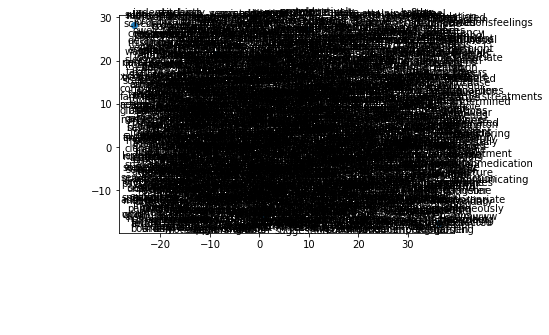

In [20]:
import matplotlib.pyplot as plt

# This is a plot with matplotlib

# reduce the data first

df2 = df[:25]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'], df2['y'])
# Lastly, the annotate method will label coordinates. 
# The first two arguments are the text label and the 2-tuple. 
# Using iterrows(), this can be very succinct:

for word, pos in df.iterrows():
    ax.annotate(word, pos)

In [19]:
df[:5]

,x,y
get,-8.740819,21.478891
treatment,36.198868,-17.452194
i,-25.259525,28.233610
requested,9.604067,27.163071
provide,1.013832,-15.813015
